In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


<ipython-input-14-4224636ff889>:32: RuntimeWarning: divide by zero encountered in log
  y_scaled = np.log(data)
<ipython-input-14-4224636ff889>:32: RuntimeWarning: invalid value encountered in log
  y_scaled = np.log(data)


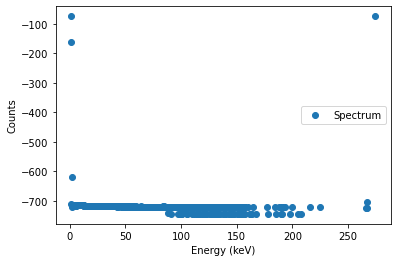

In [14]:
def calibrate_axis(x1, x2, channel1, channel2):
    """
    Calculate the scale factor and offset for converting channel numbers to real-world units.

    Parameters:
        x1 (float): Known value corresponding to channel1 (e.g., energy in keV).
        x2 (float): Known value corresponding to channel2 (e.g., energy in keV).
        channel1 (int): First reference channel number.
        channel2 (int): Second reference channel number.

    Returns:
        tuple: (scale_factor, offset)
    """
    scale_factor = (x2 - x1) / (channel2 - channel1)
    offset = x1 - (channel1 * scale_factor)
    return scale_factor, offset

# Example usage
x1, x2 = 14, 130  # Replace with real values (e.g., energy in keV)
channel1, channel2 = 50, 500  # Replace with actual channel numbers

scale_factor, offset = calibrate_axis(x1, x2, channel1, channel2)

#data = np.loadtxt("C:\\Users\\sarah\\OneDrive\\Sp2025\\Gates N-0\\bkg_spec_longtrace.Chn")
#data = np.fromfile(r"C:\Users\sarah\Downloads\bkg_spec_longtrace.Chn")
f = "C:\\Users\\sarah\\OneDrive\\Sp2025\\Gates N-0\\bkg_spec_longtrace.Chn"
h = np.fromfile(f, dtype=("i2, u2, u2, S2, u4, u4, S7, S1, S4, u2, u2"), count=1)[0]

# Compute the scaled x-axis
channels = np.arange(len(data))
x_scaled = channels * scale_factor + offset
y_scaled = np.log(data)
# Plot with scaled x-axis
plt.scatter(x_scaled, y_scaled, label="Spectrum")
plt.xlabel("Energy (keV)")  # Adjust units as needed
#plt.xlim(0,2)
plt.ylabel("Counts")
plt.legend()
plt.show()

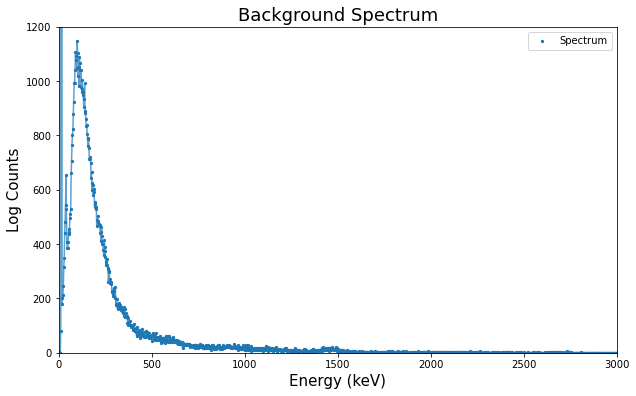

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def calibrate_axis(x1, x2, channel1, channel2):
    scale_factor = (x2 - x1) / (channel2 - channel1)
    offset = x1 - (channel1 * scale_factor)
    return scale_factor, offset

def read_file(filename):

    # Define calibration values
    x1, x2 =  32, 665.79  #keV
    channel1, channel2 = 14, 286
    scale_factor, offset = calibrate_axis(x1, x2, channel1, channel2)

    # Read the file properly
    f = filename

    # Determine header size (try 32 or 64 bytes)
    header_size = 32  # Change this if needed!

    # Read binary file, skipping the header
    with open(f, "rb") as file:
        file.seek(header_size)  # Skip the header
        data = np.fromfile(file, dtype=np.uint32)  # Read spectrum data

    # Ensure no negative or zero values for log scaling
    y_scaled = np.log(data + 1)  # Avoid log(0) errors

    # Compute the scaled x-axis
    channels = np.arange(len(data))
    x_scaled = channels * scale_factor + offset
    
    return(x_scaled, data)

x_scaled, y_scaled = read_file(r"C:\Users\sarah\OneDrive\Sp2025\Gates N-0_new\bkg_spec_longtrace.Chn")

# Plot with scaled x-axis
plt.figure(figsize=(10, 6))
plt.scatter(x_scaled, y_scaled, label="Spectrum", s=5)
plt.plot(x_scaled, y_scaled, alpha = 0.7)
plt.xlim(0,3000)
plt.ylim(0,1200)
plt.xlabel("Energy (keV)",fontsize = 15)
plt.ylabel("Log Counts", fontsize = 15)
plt.title("Background Spectrum", fontsize = 18)
plt.legend()
plt.show()

# Plot as a histogram (bar chart)
# plt.figure(figsize=(10, 5))
# plt.bar(x_scaled, data, width=scale_factor, color='blue', alpha=0.7, edgecolor='black')

# plt.xlabel("Energy (keV)")
# plt.ylabel("Counts")
# plt.title("Energy Spectrum")
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.show()

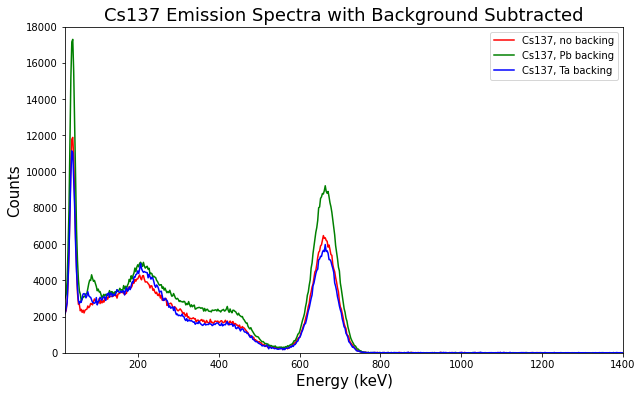

In [98]:
#CESIUM PLOTS

#import data
bkg = r"C:\Users\sarah\OneDrive\Sp2025\Gates N-0_new\bkg_spec_longtrace.Chn"
Cs_no_bkg = r"C:\Users\sarah\OneDrive\Sp2025\Gates N-0_new\Cs137_noBacking_T2.Chn"
Cs_Pb_bkg = r"C:\Users\sarah\OneDrive\Sp2025\Gates N-0_new\Cs137_PbBacking_T1.Chn"
Cs_Ta_bkg = r"C:\Users\sarah\OneDrive\Sp2025\Gates N-0_new\Cs137_Ta_Backing_15mins.Chn"

x0,y0 = read_file(bkg)
x1, y1 = read_file(Cs_no_bkg)
x2, y2 = read_file(Cs_Pb_bkg)
x3, y3 = read_file(Cs_Ta_bkg)

#normalize plot axes
#no backing:
s1 = 900/470 #CHANGE ONCE KNOWN
y1 = y1*s1
#Pb backing:
s2 = 900/590 
y2 = y2*s2
#Ta backing:
s3 = 900/391
y3 = y3*s3
#background trace:
s4 = 900/777.7
y0 = s4*y0
#subtract background
y1 = y1 - y0
y2 = y2-y0
y3 = y3-y0
#plot on top of each other to show differences in peaks
plt.figure(figsize=(10, 6))
plt.plot(x1,y1, color = 'r', label = "Cs137, no backing")
plt.plot(x2,y2, color = 'green', label = "Cs137, Pb backing")
plt.plot(x3,y3, color = 'b', label = "Cs137, Ta backing")
plt.xlabel("Energy (keV)",fontsize = 15)
plt.ylabel("Counts", fontsize = 15)
plt.title("Cs137 Emission Spectra with Background Subtracted", fontsize = 18)
plt.xlim(20,1400)
plt.ylim(0,18000)
plt.legend()
plt.show()
#import peak fits and standard deviations from other notebook

#------------------------------------------------
#NOTES
#------------------------------------------------
#I think I modified the setup to place the sample closer to the scintillator for the Pb backing trial
#gotta double check the time for the no backing T2 trial
#fits plan: get Cs peaks from no backing, then Pb and Ta peaks from those trials. 
#Plot in color from which I got the trial.

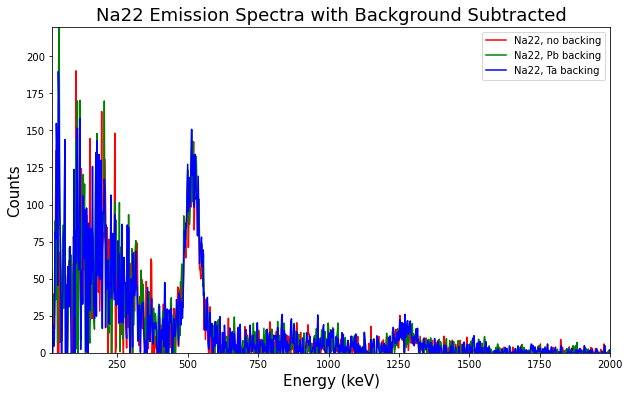

In [83]:
#SODIUM PLOTS

#import data
bkg = r"C:\Users\sarah\OneDrive\Sp2025\Gates N-0_new\bkg_spec_longtrace.Chn"
Na_no_bkg = r"C:\Users\sarah\OneDrive\Sp2025\Gates N-0_new\na22_nobacking_logplt.Chn"
Na_Pb_bkg = r"C:\Users\sarah\OneDrive\Sp2025\Gates N-0_new\Na22_Pbbacking.Chn"
Na_Ta_bkg = r"C:\Users\sarah\OneDrive\Sp2025\Gates N-0_new\Na22_Tabacking_logplt.Chn"

x0,y0 = read_file(bkg)
x1, y1 = read_file(Na_no_bkg)
x2, y2 = read_file(Na_Pb_bkg)
x3, y3 = read_file(Na_Ta_bkg)

#normalize plot axes
#no backing:
s1 = 900/902.54 #CHANGE ONCE KNOWN
y1 = y1*s1
#Pb backing:
s2 = 900/900
#y2 = np.log(y2)
y2 = y2*s2
#Ta backing:
s3 = 900/900.96
y3 = y3*s3
#background trace:
s4 = 900/777.7
y0 = s4*y0
#subtract background
y1 = y1 - y0
y2 = y2-y0
y3 = y3-y0
#plot on top of each other to show differences in peaks
plt.figure(figsize=(10, 6))
plt.plot(x1,y1, color = 'r', label = "Na22, no backing")
plt.plot(x2,y2, color = 'green', label = "Na22, Pb backing")
plt.plot(x3,y3, color = 'b', label = "Na22, Ta backing")
plt.xlabel("Energy (keV)",fontsize = 15)
plt.ylabel("Counts", fontsize = 15)
plt.title("Na22 Emission Spectra with Background Subtracted", fontsize = 18)
plt.xlim(20,2000)
plt.ylim(0,220)
plt.legend()
plt.show()
#import peak fits and standard deviations from other notebook

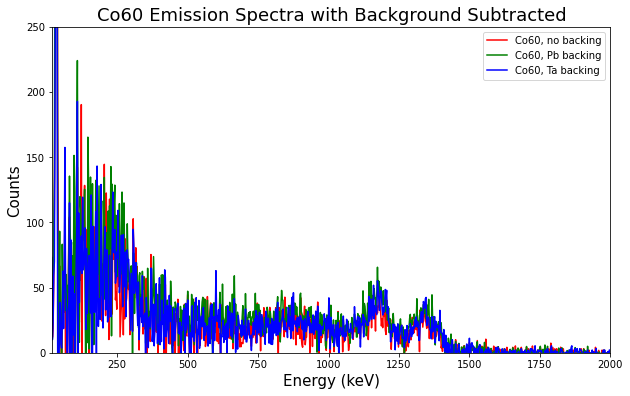

In [90]:
#COBALT PLOTS

#import data
bkg = r"C:\Users\sarah\OneDrive\Sp2025\Gates N-0_new\bkg_spec_longtrace.Chn"
Co_no_bkg = r"C:\Users\sarah\OneDrive\Sp2025\Gates N-0_new\Co60_nobacking_shield.Chn"
Co_Pb_bkg = r"C:\Users\sarah\OneDrive\Sp2025\Gates N-0_new\co_Pb_backing.Chn"
Co_Ta_bkg = r"C:\Users\sarah\OneDrive\Sp2025\Gates N-0_new\Co60_Tabacking_logplt.Chn"

x0,y0 = read_file(bkg)
x1, y1 = read_file(Co_no_bkg)
x2, y2 = read_file(Co_Pb_bkg)
x3, y3 = read_file(Co_Ta_bkg)

#normalize plot axes
#no backing:
s1 = 900/839.88
y1 = y1*s1
#Pb backing:
s2 = 900/901.92
#y2 = np.log(y2)
y2 = y2*s2
#Ta backing:
s3 = 900/838.38
y3 = y3*s3
#background trace:
s4 = 900/777.7
y0 = s4*y0
#subtract background
y1 = y1 - y0
y2 = y2-y0
y3 = y3-y0
#plot on top of each other to show differences in peaks
plt.figure(figsize=(10, 6))
plt.plot(x1,y1, color = 'r', label = "Co60, no backing")
plt.plot(x2,y2, color = 'green', label = "Co60, Pb backing")
plt.plot(x3,y3, color = 'b', label = "Co60, Ta backing")
plt.xlabel("Energy (keV)",fontsize = 15)
plt.ylabel("Counts", fontsize = 15)
plt.title("Co60 Emission Spectra with Background Subtracted", fontsize = 18)
plt.xlim(20,2000)
plt.ylim(0,250)
plt.legend()
plt.show()
#import peak fits and standard deviations from other notebook